## Contruction of Blocks as in Example 2.1, Matthews & Taylor, with a Gaussian distribution

### 0. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Data

Text(0.5, 1.0, 'Scatterplot of sample X')

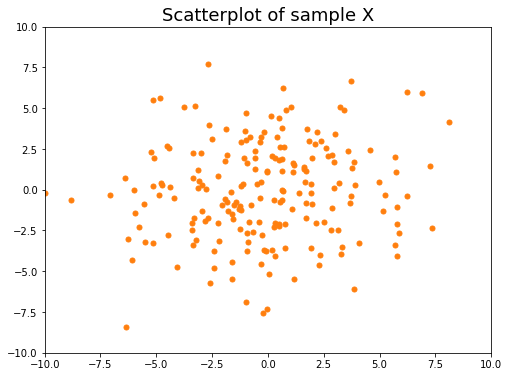

In [9]:
np.random.seed(9)
mean = np.array([0,0])
cov = np.array([[10,0.6],[0.6,10]])
N = 200
X = np.random.multivariate_normal(mean, cov, N)

plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', label = 'Data', zorder = 1, ms = 5)

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.title('Scatterplot of sample X', fontsize=18)
# plt.legend(fontsize=18)
# plt.grid()

### 2. Cutting functions

In [10]:
# each function is arbitrary and takes one of the components of the corresponding (x1, x2)
# H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
H = np.random.randint(0, 2, N)

# define the permutaions (arbitrary)
# K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
K = np.arange(1,N+1)
np.random.shuffle(K)

# we are going to order K and H in a diadic way
new_K = []
new_H = H
k_first = list(K)
k_first.sort()   # sort the list
K_List = [k_first]
K_marker = [0]  # index that says if the corresponding K_List has been partitioned or not

H_counter = []   # counter to asign values of H
h = 0
while sum(H_counter) <= len(new_H):
    H_counter.append(2**h)
    h = h+1
    
H_value = [0]*len(H_counter)    # values of H to asign
for i in range(len(H_value)):
    if i%2 == 1:
        H_value[i] = 1

for i in range(N):
    # choose list to divide
    for j in range(len(K_List)):
        if K_marker[j] == 0 and len(K_List[j]) >= 1:
            length_K = len(K_List[j])
            # choose position of new_K in the list
            K_position = (length_K+1)//2 - 1   # the middle (even) or the first integer greater than the middle (odd)
            new_K.append(K_List[j][K_position])
            # split the existing array            
            K_List.append(K_List[j][:K_position])
            K_List.append(K_List[j][K_position+1:])
            K_marker[j] = 1
            K_marker.append(0)
            K_marker.append(0)
            break
print(H_value, H_counter)
# for each element in K, asign the corresponding element in H

for i in range(N):
    for m in range(len(H_value)):
        if i+1 <= sum(H_counter[:m+1]):
            new_H[new_K[i]-1] = H_value[m]
            break
    
H = np.array(new_H)
K = np.array(new_K)
#np.random.shuffle(H)
#np.random.shuffle(K)
print(H[K-1])
print(K)


[0, 1, 0, 1, 0, 1, 0, 1] [1, 2, 4, 8, 16, 32, 64, 128]
[0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[100  50 150  25  75 125 175  12  37  62  87 112 137 162 188   6  18  31
  43  56  68  81  93 106 118 131 143 156 168 181 194   3   9  15  21  28
  34  40  46  53  59  65  71  78  84  90  96 103 109 115 121 128 134 140
 146 153 159 165 171 178 184 191 197   1   4   7  10  13  16  19  23  26
  29  32  35  38  41  44  48  51  54  57  60  63  66  69  73  76  79  82
  85  88  91  94  98 101 104 107 110 113 116 119 123 126 129 132 135 138
 141 144 148 151 154 157 160 163 166 169 173 176 179 182 186 189 192 195
 199   2   5   8  11  14  1

### 3. Let's define a class to work with the blocks

In [11]:
class block():
    def __init__(self, vertices = None, elements = None, stats = None, parent = None, leftChild = None, rightChild = None):
        self.vertices = vertices   # array with 2 bidimensional elemntes, corresponding to the vertices of the block
                                   # vertices must be ordered starting from the left bottom vertix and finishing with the
                                   # right top vertix
                                   # the array must have two rows and two columns (bidimensional case)
        self.elements = elements   # array with the points that belong to the block. Each row contains an element and each
                                   # column is a dimension (in this case, bidimensional)
        self.stats = np.sort(stats) # array with index of blocks
        self.parent = parent       # parent of the block
        self.leftChild = leftChild
        self.rightChild = rightChild
    
    def plot(self, color = 'C0', lw = 1, size = 12, print_num = True):
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[0,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[1,0], self.vertices[:,1], color = color, lw = lw)
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[1,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[0,0], self.vertices[:,1], color = color, lw = lw)
        xplot = (self.vertices[0,0]+self.vertices[1,0])/2
        yplot = (self.vertices[0,1]+self.vertices[1,1])/2
        if self.stats.size == 1 and print_num:
            plt.text(xplot, yplot, str(self.stats[0]), fontsize = size)

        
    def split(self, axis, korder):
        """
        This method split a Block and creates two child blocks, making the partirion on the korder th statistic
        axis: indicates wheter it is along the X axis (vertical, 0) or the Y axis (horizontal, 1)
        korder: is the order statistic to make the partition
        """
        # select the dimension to sort
        Xele = self.elements[:,axis]
        # select the kth order statistic
        Xorder = np.sort(Xele)
        minStat = min(self.stats)
        korder = korder - minStat
        xstat = Xorder[korder]
        # divide the stats
        statsL = self.stats[:korder+1]
        statsR = self.stats[korder+1:]
        # create the elements and vertices of each block
        Relements = np.empty((0, 2))
        Lelements = np.empty((0, 2))
        
        # add elements to vertices and elements for each case
        if axis == 0:
            Lvertices = np.array([self.vertices[0,:], [xstat, self.vertices[1,1]]])
            Rvertices = np.array([[xstat, self.vertices[0,1]], self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] <= xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:   # Xele > xstat
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
        elif axis == 1:
            Lvertices = np.array([self.vertices[0,:], [self.vertices[1,0], xstat]])
            Rvertices = np.array([[self.vertices[0,0], xstat],self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] <= xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:   # Xele > xstat
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                
        # create the childs of the block
        Rchild = block(vertices = Rvertices, elements = Relements, stats = statsR, parent = self)  
        # right side or up side (the greaters elements)
        Lchild = block(vertices = Lvertices, elements = Lelements, stats = statsL, parent = self)   
        # left side or down side (the smaller elements)
        
        # asociate the childs to the parten
        self.rightChild = Rchild
        self.leftChild = Lchild
        # return the place where the partition was made
        return xstat
        

### 4. Partition: general case
#### We proceed to use the block class to apply the partition in a iterative loop

In [17]:
# create list with blocks

lim_inf = np.floor(X.min(axis=0)-X.std(axis=0))[0]
lim_max = np.ceil(X.max(axis=0)+X.std(axis=0))[0]

First_Block = block(vertices = np.array([[lim_inf,lim_inf],[lim_max,lim_max]]), elements = X, stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    #print(i)
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None:
            #print(H[K[i]-1])
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])
            #print(Blocks_List[j].leftChild.stats)
            #print(Blocks_List[j].rightChild.stats)
            #print(Blocks_List[j].leftChild.elements)
            #print(Blocks_List[j].rightChild.elements)
            break

### Now we plot the finals blocks

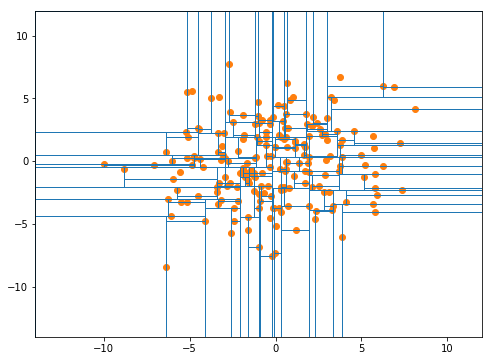

In [18]:
# plot
fig = plt.figure(figsize=(8,6))
# Bloque.plot(color = 'g')
plt.plot(X[:,0], X[:,1], 'o', color = 'C1')

plt.xlim(lim_inf,lim_max)
plt.ylim(lim_inf,lim_max)

for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot(print_num = False)
        
